<a href="https://colab.research.google.com/github/SteffanBurnette/TensorFlow-/blob/Convolutional-Neural-Networks/IntroToConvolutionalNeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction To Convolutinal Neural Networks and Computer Vision

Computer vision is the practice of writing which can discover patterns in visual data. Such as the camera of a self driving car recognizing the car infront.

#Get The data

The dataset has been modified to work with the neural network and the code to modify it is in the github repo.
https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb


In [2]:
import zipfile
import os
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pathlib
import matplotlib.image as mpimg
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory


print("W")

W


In [3]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
#!wget means get the file and download it into colab

#unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-01-13 22:23:31--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.136.207, 142.250.148.207, 209.85.200.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.136.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   138MB/s    in 0.8s    

2024-01-13 22:23:32 (138 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



The dataset was modified to use only two classes (pizza and steak) using the image data modification notebook.

🔑**Note**: We start with a smaller dataset so that we can experiment quickly and figure out what works and what doesnt work before scaling up.

### **Inspect** the data
A very crucial step at the beginnig of every machine learning project is becoming one with the data. And for a computer vision project, this usually means visualizing many samples of the data.

In [4]:
#Lists all the files in the directory
!ls pizza_steak
#List all the files in the sub directory
!ls pizza_steak/train
#List all the files in the subs sub directory
!ls pizza_steak/train/steak

test  train
pizza  steak
1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.

In [5]:
#Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

#We have an extra file in the pizza_steak directory called ".DS_Store"

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [6]:
#Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
#os.listdir() lists all of the names in a directory
num_steak_images_train

750

To visualize our images, first lets get the class names programmatically.

In [7]:
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) #Created a list of names from the subdirectory
print(class_names)

['pizza' 'steak']


In [8]:
#Lets visualize our images
def view_random_image(target_dir, target_class):
  #Set up the target directory (we'll view images from here)
  target_folder = target_dir + "/"+ target_class

  #Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  #Randomly samples one of the samples in the directory

  #Read in an image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") #Shows the shape of the image

  return img



Image shape: (512, 512, 3)


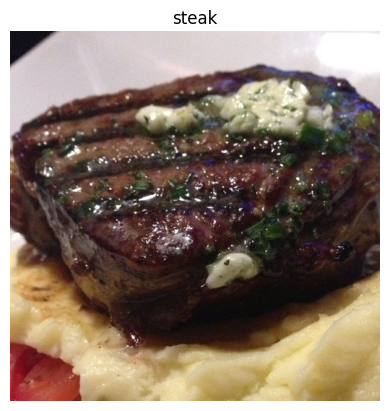

In [9]:
#View a random steak image from the training dataset
steak_img = view_random_image(target_dir = "pizza_steak/train",target_class="steak" )

Image shape: (512, 384, 3)


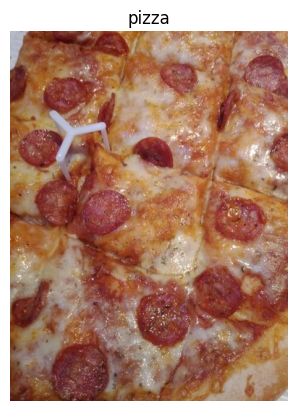

In [10]:
#View a random pizza image from the training dataset
pizza_img = view_random_image(target_dir = "pizza_steak/train",target_class="pizza" )

In [11]:
#The images that we've imported and plotted are actually giant arrays/tensors with different pixel values
#Pixel colors are always between the values 0-255
tf.constant(steak_img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 16,  14,  19],
        [ 18,  16,  21],
        [ 18,  16,  21],
        ...,
        [235, 226, 227],
        [235, 226, 227],
        [235, 226, 227]],

       [[ 20,  18,  23],
        [ 22,  20,  25],
        [ 22,  20,  25],
        ...,
        [238, 229, 230],
        [237, 228, 229],
        [237, 228, 229]],

       [[ 20,  18,  23],
        [ 22,  20,  25],
        [ 23,  21,  26],
        ...,
        [238, 232, 232],
        [237, 231, 231],
        [236, 230, 230]],

       ...,

       [[164,  38,  52],
        [160,  34,  48],
        [160,  32,  47],
        ...,
        [186, 164, 106],
        [186, 164, 106],
        [186, 164, 106]],

       [[165,  40,  54],
        [160,  35,  49],
        [160,  33,  50],
        ...,
        [183, 161, 101],
        [184, 162, 102],
        [185, 163, 103]],

       [[173,  48,  62],
        [167,  42,  56],
        [166,  39,  56],
        ...,
        [184, 162, 10

### Normalize the data so that it be be used more effectivly in the convolutional neural network

Divide the entire dataset by the largest value in the dataset (as type float) so that you end up with values between 0-1, which is effectivly normalizing the data.
* By this logic we divide by 255. because for pixels the values range from 0-255 (min=0, max=255 always)

🔑**Note**- If you decide to use this method you will need to do it for each image individually which will be tedious.

In [12]:
steak_train_norm = steak_img/255.
pizza_train_norm = pizza_img/255.

🔑**Note**- Many machine learning models, including neural networks perfer the values that they work with to be between 0 and 1. Knowing this, one of the most preprocessing steps for working with images is to **scale**( also reffered to as **normalize**) their pixel values by dividing the image arrays by 255.

##An End-to-End Example
Lets build a convolutionl neural network to find patterns in our images, more specifically:
* Load our images
* Preprocess our images
* Build a **`CNN`** to find patterns in our images
* Compile our **`CNN`**
* Fit the **`CNN`** to our training data


In [19]:
#Set the random seed for reproducibility
tf.random.set_seed(42)

#Preprocess the data(get all of the pixel values between 0 & 1, also called scaling/normalization)
#Two instances of imagedatagenerator
train_datagen = ImageDataGenerator(rescale=1./255.) #Is depreciated
valid_datagen = ImageDataGenerator(rescale=1./255.)

#train_datagen_notdpreciated = image_dataset_from_directory(rescale=1./255.)

#Set up paths to our datas directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"


#Input data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size = 32,
                                               target_size= (224,224),#Reshapes the images to (224,224)
                                               class_mode="binary", seed=42) #Seed is for reproducibility
#The test data is usally called validation data
valid_data =  valid_datagen.flow_from_directory(directory= test_dir, batch_size=32, target_size=(224, 224), class_mode="binary", seed=42)

#Build a CNN model (same as the tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"), #Exact same as the first layer
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#2. Compile our CNN mode
#Will use binary cross entropy since class_mode="binary"
#The metrics will be accuracy since this is a classification problem
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

#3. Fit the model
#flow_from_directory creates the data and labels automatically for us.
#So x and y is already defined in train_data which is why we can pass it by itself
model_1.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data,
            validation_steps=len(valid_data))

#The reason why we put things into batches is so that it can all fit on the memory of the computer chip.


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 126s 3s/step - loss: 0.6786 - accuracy: 0.6013 - val_loss: 0.5779 - val_accuracy: 0.6840
Epoch 2/5
47/47 [==============================] - 118s 3s/step - loss: 0.4974 - accuracy: 0.7587 - val_loss: 0.3841 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 118s 3s/step - loss: 0.4254 - accuracy: 0.8053 - val_loss: 0.3405 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 117s 2s/step - loss: 0.4004 - accuracy: 0.8233 - val_loss: 0.3244 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 108s 2s/step - loss: 0.3572 - accuracy: 0.8513 - val_loss: 0.3354 - val_accuracy: 0.8620
